# Prepare configuration for the pipeline and Google authorization, import libraries

In [8]:
# Import libraries
import os
import sys
from google.colab import auth
import yaml
# Mount your Google Drive to access persistent files
from google.colab import drive
drive.mount('/content/drive')

# Authenticate user
auth.authenticate_user()

# Create project direction
project_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline"
os.makedirs(project_dir, exist_ok=True)
# Make sure the path is in sys.path
sys.path.append(project_dir)

# Build .yaml-file
# Define the configuration data (this can be modified as per your need)
# Documentation for Open-Meteo requests
# https://pypi.org/project/openmeteo-requests/

config_data = {
    "project": {
        "project_id": "elt-siegburg-weather-forecast",
        "dataset_historical": "elt_weather_dataset_historical_siegburg_2017_2024",
        "table_historical": "elt_weather_table_historical_siegburg_2017",
        "dataset_month": "elt_weather_dataset_siegburg_october_2025",
        "table_8h": "elt_weather_8h_table_{timestamp}",
        "dataset_prediction": "elt_weather_dataset_prediction_siegburg_october_2025",
    },
    # Weather data provided by Open-Meteo (CC BY 4.0)
    "api_current": {
        "elt_weather_table_current": "https://api.open-meteo.com/v1/forecast?latitude=50.79086&longitude=7.2064056&current=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
    },
    # Weather data provided by Open-Meteo (CC BY 4.0)
      "api_historical":{
         "elt_weather_table_historical_siegburg_2017": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2017-01-01&end_date=2017-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2018": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2018-01-01&end_date=2018-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2019": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2019-01-01&end_date=2019-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2020": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2020-01-01&end_date=2020-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2021": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2021-01-01&end_date=2021-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2022": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2022-01-01&end_date=2022-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2023": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2023-01-01&end_date=2023-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
         "elt_weather_table_historical_siegburg_2024": "https://archive-api.open-meteo.com/v1/archive?latitude=50.79086&longitude=7.2064056&start_date=2024-01-01&end_date=2024-12-31&hourly=temperature_2m,relative_humidity_2m,surface_pressure,wind_speed_10m,wind_direction_10m,precipitation&timezone=Europe%2FBerlin",
    },
    # Placeholders for open-meteo python packages
    "params_current": {
        "latitude": 50.79086,
        "longitude": 7.2064056,
        "start_date": "2017-01-01",
        "end_date": "2017-12-31",
        "current": ["temperature_2m", "relative_humidity_2m", "windspeed_10m", "winddirection_10m",
                    "precipitation", "surface_pressure"],
        "timezone": "Europe/Berlin"
    },
    # Placeholders for open-meteo python packages
    "params_historical": {
        "latitude": 50.79086,
        "longitude": 7.2064056,
        "start_date": "2017-01-01",
        "end_date": "2017-12-31",
        "hourly": ["temperature_2m", "relative_humidity_2m", "precipitation", "wind_speed_10m", "wind_direction_10m"],
        "timezone": "Europe/Berlin",
    }
}

# Write this configuration to a YAML file in Colab
config_file_path = '/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml'
with open(config_file_path, 'w') as file:
    yaml.dump(config_data, file, default_flow_style=False)

# Confirm the file has been created
print(f"config.yaml has been written to {config_file_path}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
config.yaml has been written to /content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml


# GCP Ressource Management (gcp_utils/ or gcloud_admin/)

In [9]:
# Import libraries
import os
import sys
from google.colab import auth
import datetime

# Create gcp utilization direction
gcp_utils_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils"
os.makedirs(gcp_utils_dir, exist_ok=True)
# Make sure the path is in sys.path
sys.path.append(gcp_utils_dir)

# Generate .py files
# Load the YAML configuration file
load_config = """
import yaml

def load_config(config_file):
    with open(config_file, 'r') as file:
        return yaml.safe_load(file)
"""
# Save to file
with open(f"{project_dir}/load_config.py", "w") as f:
    f.write(load_config)

# create_dataset.py - generate and save inside /contentdrive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
extract_code = """
from google.cloud import bigquery

def create_dataset(project_id, dataset_id, location="EU"):
    # Creates a BigQuery dataset if it doesn't exist.
    client = bigquery.Client(project=project_id)
    dataset_ref = client.dataset(dataset_id)
    try:
        client.get_dataset(dataset_ref)
        print(f"Dataset '{dataset_id}' already exists.")
    except:
        dataset = bigquery.Dataset(dataset_ref)
        dataset.location = location
        client.create_dataset(dataset)
        print(f"Dataset '{dataset_id}' created.")
"""

# Save to file
with open(f"{gcp_utils_dir}/create_dataset.py", "w") as f:
    f.write(extract_code)


# create_table.py - generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
extract_code = """
from google.cloud import bigquery

def create_table(project_id, dataset_id, table_id):

    # Creates a BigQuery table if it doesn't exist.
    client = bigquery.Client(project=project_id)
    dataset_ref = client.dataset(dataset_id)
    table_ref = dataset_ref.table(table_id)
    try:
        client.get_table(table_ref)
        print(f"Table '{table_id}' already exists.")
    except:
        # table = bigquery.Table(table_ref, schema=schema)
        table = bigquery.Table(table_ref)
        client.create_table(table)
        print(f"Table '{table_id}' created.")
"""

# Save to file
with open(f"{gcp_utils_dir}/create_table.py", "w") as f:
    f.write(extract_code)


# gcp_utils/main.py - generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/gcp_utils
extract_code = """
from create_dataset import create_dataset
from create_table import create_table
from load_config import load_config

def main(project, dataset, table):

    # Load the config from the file we just created
    config = load_config('/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml')

    # Access the configurations
    project_id = config['project']['project_id']
    dataset_historical = config['project']['dataset_historical']
    table_historical = config['project']['table_historical']
    dataset_month = config['project']['dataset_month']
    table_8h = config['project']['table_8h']
    dataset_prediction = config['project']['dataset_prediction']
    params_current = config['params_current']
    params_historical = config['params_historical']
    url_historical_2017_2014 = config['api_historical']
    url_historical_2017 = config['api_historical']['elt_weather_table_historical_siegburg_2017']
    url_current = config['api_current']['elt_weather_table_current']

    create_dataset(project, dataset)
    create_table(project, dataset, table)

if __name__ == "__main__":
    # You can provide default values here, or leave it empty
    main("project_id", "dataset", "table")

"""

# Save to file
with open(f"{gcp_utils_dir}/manage_gcp.py", "w") as f:
    f.write(extract_code)

# ELT/ML Pipeline

In [10]:
main_code = """
# prefect pipeline
import pandas as pd
import numpy as np
import datetime
from prefect import flow, task
from load_config import load_config
from load_utils import load_to_bigquery, load_to_bigquery_raw, numpy_to_dataframe
from fetch_utils import api_fetch_url, fetch_historical_weather
from transform_utils import transform_data
from predictor_utils import train_model, predict_current
from visualization_utils import plot_predictions_over_time, visualize_current_prediction
from query_utils import extract_full_query, extract_weather_current
from gcp_utils.create_dataset import create_dataset
from gcp_utils.create_table import create_table

# -------------
# Prefect Tasks
# -------------

@task
def load_config_task(config_path: str):
    return load_config(config_path)


@task(retries=3, retry_delay_seconds=10)
def create_dataset_task(project_id: str, dataset_id: str):
    return create_dataset(project_id, dataset_id)


@task(retries=3, retry_delay_seconds=10)
def create_table_task(project_id: str, dataset_id: str, table_id: str):
    return create_table(project_id, dataset_id, table_id)


@task
def fetch_historical_task(config: dict):
    historical_data_dict, historical_df_dict = fetch_historical_weather()
    return historical_data_dict, historical_df_dict


@task
def fetch_current_task(url_current: str):
    return api_fetch_url(url_current)


@task
def load_historical_to_bq(df_dict: dict, project_id: str, dataset_historical: str):
    for year, df in df_dict.items():
        if df.empty:
            continue
        table_name = f"elt_weather_table_historical_siegburg_{year}"
        load_to_bigquery_raw(df, project_id, dataset_historical, table_name)


@task
def load_current_to_bq(df_current: pd.DataFrame, project_id: str, dataset_month: str, table_current: str):
    load_to_bigquery_raw(df_current, project_id, dataset_month, table_current)


@task
def get_seasonal_historical(project_id: str, dataset_historical: str):
    current_time = datetime.datetime.now()
    target_month = current_time.month
    season_months = [(target_month - 1) % 12 or 12,
                     target_month,
                     (target_month + 1 - 1) % 12 + 1]

    df_historical_list = []

    for year in range(2017, 2025):
        table = f"elt_weather_table_historical_siegburg_{year}"
        query = f'''
        SELECT
          time,
          temperature_2m AS temp,
          relative_humidity_2m AS rel_humidity,
          surface_pressure AS pressure,
          wind_speed_10m AS wind_speed,
          wind_direction_10m AS wind_direction,
          precipitation AS precip,

          -- Lags
          LAG(temperature_2m, 1) OVER (ORDER BY time) AS lag_temp_1h,
          LAG(temperature_2m, 2) OVER (ORDER BY time) AS lag_temp_2h,
          LAG(temperature_2m, 3) OVER (ORDER BY time) AS lag_temp_3h,

          LAG(relative_humidity_2m, 1) OVER (ORDER BY time) AS lag_rel_humidity_1h,
          LAG(relative_humidity_2m, 2) OVER (ORDER BY time) AS lag_rel_humidity_2h,
          LAG(relative_humidity_2m, 3) OVER (ORDER BY time) AS lag_rel_humidity_3h,

          LAG(surface_pressure, 1) OVER (ORDER BY time) AS lag_pressure_1h,
          LAG(surface_pressure, 2) OVER (ORDER BY time) AS lag_pressure_2h,
          LAG(surface_pressure, 3) OVER (ORDER BY time) AS lag_pressure_3h,

          LAG(wind_speed_10m, 1) OVER (ORDER BY time) AS lag_wind_speed_1h,
          LAG(wind_speed_10m, 2) OVER (ORDER BY time) AS lag_wind_speed_2h,
          LAG(wind_speed_10m, 3) OVER (ORDER BY time) AS lag_wind_speed_3h,

          LAG(wind_direction_10m, 1) OVER (ORDER BY time) AS lag_wind_direction_1h,
          LAG(wind_direction_10m, 2) OVER (ORDER BY time) AS lag_wind_direction_2h,
          LAG(wind_direction_10m, 3) OVER (ORDER BY time) AS lag_wind_direction_3h,

          LAG(precipitation, 1) OVER (ORDER BY time) AS lag_precip_1h,
          LAG(precipitation, 2) OVER (ORDER BY time) AS lag_precip_2h,
          LAG(precipitation, 3) OVER (ORDER BY time) AS lag_precip_3h
        FROM `{project_id}.{dataset_historical}.{table}`
        '''

        df = extract_full_query(query, project_id)

        if not df.empty:
            df['time'] = pd.to_datetime(df['time'])
            df['month'] = df['time'].dt.month

            # Filter data to ±1 month around current time
            df = df[df['month'].isin(season_months)]

            # Add wind direction cyclical encoding
            df['wind_dir_sin'] = np.sin(np.deg2rad(df['wind_direction']))
            df['wind_dir_cos'] = np.cos(np.deg2rad(df['wind_direction']))

            # Add diurnal cyclical encodings
            df['hour'] = df['time'].dt.hour
            df['sin_hour'] = np.sin(2 * np.pi * df['hour'] / 24)
            df['cos_hour'] = np.cos(2 * np.pi * df['hour'] / 24)

            # Drop rows with missing lag values
            df.dropna(inplace=True)
            df_historical_list.append(df)
            print(f"Loaded {len(df)} rows from {table}")
        else:
            print(f"No data found for year {year}.")

    # Combine and summarize
    if df_historical_list:
        df_historical = pd.concat(df_historical_list, ignore_index=True)
        print(f"Total rows after seasonal concatenation: {len(df_historical)}")

        # Optional rolling/aggregate features
        df_historical['temp_mean_last3h'] = df_historical[['lag_temp_1h','lag_temp_2h','lag_temp_3h']].mean(axis=1)
        df_historical['wind_speed_mean_last3h'] = df_historical[['lag_wind_speed_1h','lag_wind_speed_2h','lag_wind_speed_3h']].mean(axis=1)
        df_historical['humidity_mean_last3h'] = df_historical[['lag_rel_humidity_1h','lag_rel_humidity_2h','lag_rel_humidity_3h']].mean(axis=1)

        print(df_historical.head())
        return df_historical
    else:
        print("No seasonal historical data loaded.")


@task
def extract_current_from_bq(project_id: str, dataset_month: str, table_current: str):
    return extract_weather_current(project_id, dataset_month, table_current)


@task
def train_and_predict(df_historical: pd.DataFrame, df_current: pd.DataFrame):
    df_trans_historical = transform_data(df_historical)
    df_trans_current = transform_data(df_current)
    model = train_model(df_trans_historical)
    pred_temp = predict_current(model, df_trans_current)

    X_test = df_trans_historical[['rel_humidity', 'precip', 'pressure', 'wind_speed', 'wind_direction']]
    y_test = df_trans_historical['temp']
    y_pred = model.predict(X_test)
    plot_predictions_over_time(df_trans_historical['date'], y_test, y_pred)
    visualize_current_prediction(df_trans_current, pred_temp)
    return pred_temp


@task
def load_prediction_to_bq(pred_temp: np.ndarray, project_id: str, dataset_prediction: str, table_pred: str):
    df_pred = numpy_to_dataframe(pred_temp)
    load_to_bigquery(df_pred, project_id, dataset_prediction, table_pred)


# ------------------
# Flow Orchestration
# ------------------

@flow(name="Weather ELT + Machine Learning Pipeline")
def weather_pipeline_flow(config_path: str):
    print("Running weather pipeline...")

    # Load config
    config = load_config_task(config_path)

    project_id = config['project']['project_id']
    dataset_historical = config['project']['dataset_historical']
    dataset_month = config['project']['dataset_month']
    url_historical_2017_2014 = config['api_historical']
    url_current = config['api_current']['elt_weather_table_current']
    dataset_prediction = config['project']['dataset_prediction']

    # Get timestamps
    timestamp_bq = datetime.datetime.now().strftime("%Y%m%d_%H%M")
    table_current = f"elt_weather_8h_table_{timestamp_bq}"
    table_prediction = f"elt_weather_prediction_table_{timestamp_bq}"

    # Create datasets and tables
    # Loop through each table name in the list 'url_historical_2017_2014'
    # This creates tables for each historical weather table in the BigQuery dataset.
    for n in url_historical_2017_2014:
      create_dataset_task(project_id, dataset_historical)
      create_table_task(project_id, dataset_historical, n)

    create_dataset_task(project_id, dataset_month)
    create_table_task(project_id, dataset_month, table_current)

    create_dataset_task(project_id, dataset_prediction)
    create_table_task(project_id, dataset_prediction, table_prediction)


    # Fetch and load historical & current data
    historical_data_dict, historical_df_dict = fetch_historical_task(config)
    load_historical_to_bq(historical_df_dict, project_id, dataset_historical)

    current_data = fetch_current_task(url_current)
    df_current = pd.DataFrame([current_data['current']])
    load_current_to_bq(df_current, project_id, dataset_month, table_current)

    # Seasonal historical + current from BQ
    df_historical_seasonal = get_seasonal_historical(project_id, dataset_historical)
    df_current_bq = extract_current_from_bq(project_id, dataset_month, table_current)

    # Train + Predict
    pred_temp = train_and_predict(df_historical_seasonal, df_current_bq)

    # Load prediction to BQ
    load_prediction_to_bq(pred_temp, project_id, dataset_prediction, table_prediction)

# --------
# Run Flow
# --------

if __name__ == "__main__":
    weather_pipeline_flow("/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml")
    weather_pipeline_flow.visualize(filename="/content/drive/MyDrive/elt_weather_pipeline_dag.png")
"""
project_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline"
with open(f"{project_dir}/main.py", "w") as f:
    f.write(main_code)

# Requirements / README / License

In [11]:
# requirements.txt — generate and save inside /content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline
requirements_code = '''
google-colab
PyYAML
google-cloud-bigquery
requests
requests_cache
retry-requests
prefect
pandas
scikit-learn
matplotlib
'''

with open(f"/content/drive/MyDrive/elt_pipeline_weather_forecast/requirements.txt", "w") as f:
    f.write(requirements_code)


readme_code = """
# 🌦️ Weather Forecasting ELT Pipeline

This project implements a **modular, scalable end-to-end ELT (Extract, Load, Transform)** pipeline for **weather forecasting** using **Google Colab Python** and **Google Cloud Platform (BigQuery)**. It automates the process of collecting, storing, transforming, and modeling weather data to predict **hourly temperatures** in **Siegburg, Germany**.

The weather forecasting is at this stage in a simplified form to represent the function of the pipeline. In future, there may be a deeper focus on more complex machine learning models, but for now, it serves the purpose of understanding the pipeline.
Data is sourced from the **[Open-Meteo API](https://open-meteo.com/)** and processed into a structured format to support **machine learning-based forecasting**. The pipeline is built for experimentation and can be scaled with additional features like orchestration or containerization.

---

## Project Overview

The pipeline performs the following high-level steps:

1. **Extract** historical and current weather data via the [Open-Meteo API](https://open-meteo.com/).
2. **Load** this data into **Google BigQuery**, partitioned by year.
3. **Transform** and prepare the data through feature engineering.
4. **Predict** hourly temperatures using a **Random Forest** regression model.
5. **Store** the predictions back to BigQuery.

---

## Tools and Technologies Used

- **Google Colab**: Interactive environment for development, experimentation, and running Python code.
- **Google Cloud Platform (GCP)**: Provides the cloud infrastructure for this project, including **BigQuery** for storing and querying large weather datasets.


This combination of tools ensures an efficient, scalable, and cloud-native approach to building the weather forecasting pipeline.

For data retrieval, the project uses the **[Open-Meteo API](https://open-meteo.com/)**, which provides weather forecasts for different geographical regions.

---

## Attribution for Weather Data

This project uses weather data provided by [Open-Meteo.com](https://open-meteo.com), which is offered under the [Attribution 4.0 International (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/) license.

You are free to copy, redistribute, and adapt the data, but please ensure proper attribution:

- **Credit**: "Weather data by Open-Meteo.com"
- **Link**: [Open-Meteo.com](https://open-meteo.com)
- **Changes**: If you make changes to the data, you must indicate that modifications were made.

For more information, refer to the [Open-Meteo Terms of Service](https://open-meteo.com/en/terms).

**Example attribution (HTML for display in web or applications):**
```html
<a href="https://open-meteo.com/">
	Weather data by Open-Meteo.com
</a>
```
---

## Project Structure

```text
weather-forecasting-elt/
├── elt_pipeline_weather.ipynb      # Main notebook runner
├── gcp_utils/                      # Utilities for Google Cloud (BigQuery)
│   ├── create_dataset.py
│   ├── create_table.py
│   └── manage_gcp.py
├── weather_pipeline/               # ELT and ML logic
│   ├── Dockerfile
│   ├── fetch_utils.py
│   ├── load.py
│   ├── load_config.py
│   ├── main.py
│   ├── predictor_utils.py
│   ├── query_utils.py
│   ├── transform_utils.py
│   ├── visualization_utils.py
├── config.yaml                     # Central configuration file
├── requirements.txt                # Required packages
└── README.md                       # This file
```

---

## ELT Process

### 1. Extract
- Fetches historical weather data (2017–2024) and current conditions using Open-Meteo's REST API.
- Stores raw JSON responses in memory and converts them to structured Pandas DataFrames.

### 2. Load
- Loads raw weather data into **Google BigQuery**, storing each year's data in a separate table.
- Data is loaded using the `google-cloud-bigquery` Python client.

### 3. Transform
- Cleans and formats the raw data.
- Feature engineering includes:
  - `temperature`, `rel_humidity`, `precipitation`, `pressure`, `wind_speed`, `wind_direction`
- Combines historical data across multiple years (e.g., for October only).
- Prepares the data for machine learning.

### 4. Model (Predict)
- Trains a **Random Forest Regressor** using historical October data.
- Predicts hourly temperatures.
- Evaluates and optionally visualizes prediction results.

### 5. Store
- Saves prediction results back to BigQuery for analytics or dashboarding.

---

## Usage Guide

### 1. Set your Google Cloud Project ID
- Before running the notebook, open `elt_pipeline_weather.ipynb` and locate the configuration dictionary.
- Replace the `project_id` value with your own Google Cloud project ID and `dataset_month` to the current month, for example:

```python
config_data = {
    "project": {
        "project_id": "your-gcp-project-id",
        "dataset_historical": "elt_weather_dataset_historical_siegburg_2017_2024",
        "table_historical": "elt_weather_table_historical_siegburg_2017",
        "dataset_month": "elt_weather_dataset_siegburg_october_2025",
        "table_8h": "elt_weather_8h_table_{timestamp}",
        # ... other config values ...
    }
}
```

### 2. Run the Notebook
#### Execute all cells sequentially. This will:
- Fetch historical and current weather data
- Load data into BigQuery
- Run transformations and train a Random Forest model
- Store prediction results back into BigQuery

### 3. View Results
After completion, explore the predictions stored in your BigQuery dataset or extend the project with visualization tools.

---


## Key Modules

### `gcp_utils/`
- `create_dataset.py` – Create BigQuery datasets
- `create_table.py` – Create BigQuery tables
- `jobtables.py` – Submit query jobs to BigQuery
- `manage_gcp.py` – CLI runner for GCP utilities

### `weather_pipeline/`
- `fetch_utils.py` – Handle API requests and data formatting
- `load_utils.py` – Load Pandas DataFrames to BigQuery, and convert NumPy arrays to DataFrames
- `load_config.py` – Read config from YAML file
- `main.py` – Central runner script for the pipeline
- `predictor_utils.py` – Train and evaluate prediction models
- `query_utils.py` – Construct and run SQL queries
- `transform_utils.py` – Feature engineering and cleaning
- `visualization_utils.py` – Plotting and metrics

---

## Configuration

- `config.yaml`: Central configuration file for setting:
  - API parameters
  - BigQuery dataset/table names
  - ML model settings

---

## Requirements

- Python 3.7+
- Google Cloud credentials (service account with BigQuery permissions)
- Jupyter Notebook or Google Colab
- Install dependencies via:

```bash
!pip install -r /content/drive/MyDrive/elt_pipeline_weather_forecast/requirements.txt
```

---

## Future Work

This project is actively being expanded to improve automation, portability, and predictive capabilities:

### Orchestration
- Add workflow orchestration with **Airflow**
- Schedule regular data updates and monitor pipeline runs

### Dockerization
- Containerize the pipeline using **Docker** for reproducible environments
- Facilitate deployment across different machines or cloud platforms

### Machine Learning
- Integrate a lightweight ML component to generate **1-hour weather forecasts**
- Continuously retrain and evaluate the model as new data arrives

**Goal:**
A reproducible, automated ELT pipeline that collects, transforms, and predicts short-term weather data with minimal manual intervention.

---

## License

- This project is licensed under the [MIT License](LICENSE).
- See the LICENSE file for details.

---

## Acknowledgements

- Thanks to public weather data providers Open Meteo for API access
- Inspired by best practices in ELT pipeline design and reproducible data science
"""

with open("/content/drive/MyDrive/elt_pipeline_weather_forecast/README.md", "w") as f:
    f.write(readme_code)

# Python code to create the LICENSE file
# Python code to create the LICENSE file with the updated text

license_text = """
MIT License

Copyright (c) 2025 claxcoding

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
THE SOFTWARE.

Acknowledgments

This project utilizes the following platforms and services:
- Google Colab: For interactive development, coding, and experimentation.
- Google Cloud Platform (BigQuery): For data storage and processing.
- Open-Meteo API: For fetching weather data.

"""

# Create LICENSE file with updated text in Colab environment
with open("/content/drive/MyDrive/elt_pipeline_weather_forecast/LICENSE", "w") as license_file:
    license_file.write(license_text)


# Install Requirements


In [12]:
!pip install -r /content/drive/MyDrive/elt_pipeline_weather_forecast/requirements.txt

# Run the Prefect Pipeline-Script

INFO:prefect.flow_runs:Beginning flow run 'diligent-pillbug' for flow 'Weather ELT + Machine Learning Pipeline'


/content/drive/MyDrive/elt_pipeline_weather_forecast/weather_pipeline/main.py
Running weather pipeline...


INFO:prefect.task_runs:Finished in state Completed()
INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2017' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2018' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2019' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2020' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2021' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2022' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2023' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_historical_siegburg_2017_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_table_historical_siegburg_2024' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_siegburg_october_2025' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_8h_table_20251105_0938' created.


INFO:prefect.task_runs:Finished in state Completed()


Dataset 'elt_weather_dataset_prediction_siegburg_october_2025' already exists.


INFO:prefect.task_runs:Finished in state Completed()


Table 'elt_weather_prediction_table_20251105_0938' created.
Fetching weather data for 2017...
  → Loaded 8760 hourly records for 2017
Fetching weather data for 2018...
  → Loaded 8760 hourly records for 2018
Fetching weather data for 2019...
  → Loaded 8760 hourly records for 2019
Fetching weather data for 2020...
  → Loaded 8784 hourly records for 2020
Fetching weather data for 2021...
  → Loaded 8760 hourly records for 2021
Fetching weather data for 2022...
  → Loaded 8760 hourly records for 2022
Fetching weather data for 2023...
  → Loaded 8760 hourly records for 2023
Fetching weather data for 2024...


INFO:prefect.task_runs:Finished in state Completed()


  → Loaded 8784 hourly records for 2024
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2017 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2018 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2019 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2020 already has data (8784 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2021 already has data (8760 rows). Skipping load.
Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_

INFO:prefect.task_runs:Finished in state Completed()


Table elt-siegburg-weather-forecast.elt_weather_dataset_historical_siegburg_2017_2024.elt_weather_table_historical_siegburg_2024 already has data (8784 rows). Skipping load.


INFO:prefect.task_runs:Finished in state Completed()


Table elt-siegburg-weather-forecast.elt_weather_dataset_siegburg_october_2025.elt_weather_8h_table_20251105_0938 exists but is empty. Loading data...


INFO:prefect.task_runs:Finished in state Completed()


Loaded 1 rows to elt-siegburg-weather-forecast.elt_weather_dataset_siegburg_october_2025.elt_weather_8h_table_20251105_0938
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2017
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2018
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2019
Query executed successfully. Retrieved 8784 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2020
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2021
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2022
Query executed successfully. Retrieved 8760 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2023


INFO:prefect.task_runs:Finished in state Completed()


Query executed successfully. Retrieved 8784 rows.
Loaded 2208 rows from elt_weather_table_historical_siegburg_2024
Total rows after seasonal concatenation: 17664
                 time  temp  rel_humidity  pressure  wind_speed  \
0 2017-10-01 00:00:00  10.9            95    1012.9         4.2   
1 2017-10-01 01:00:00   9.9            97    1012.6         4.9   
2 2017-10-01 02:00:00  10.2            96    1013.0         4.3   
3 2017-10-01 03:00:00   9.4            96    1013.3         6.5   
4 2017-10-01 04:00:00   8.6            94    1013.6         6.5   

   wind_direction  precip  lag_temp_1h  lag_temp_2h  lag_temp_3h  ...  \
0             250     0.0         11.4         11.8         12.4  ...   
1             216     0.0         10.9         11.4         11.8  ...   
2             175     0.0          9.9         10.9         11.4  ...   
3             180     0.0         10.2          9.9         10.9  ...   
4             174     0.0          9.4         10.2          9.9  ... 

INFO:prefect.task_runs:Finished in state Completed()


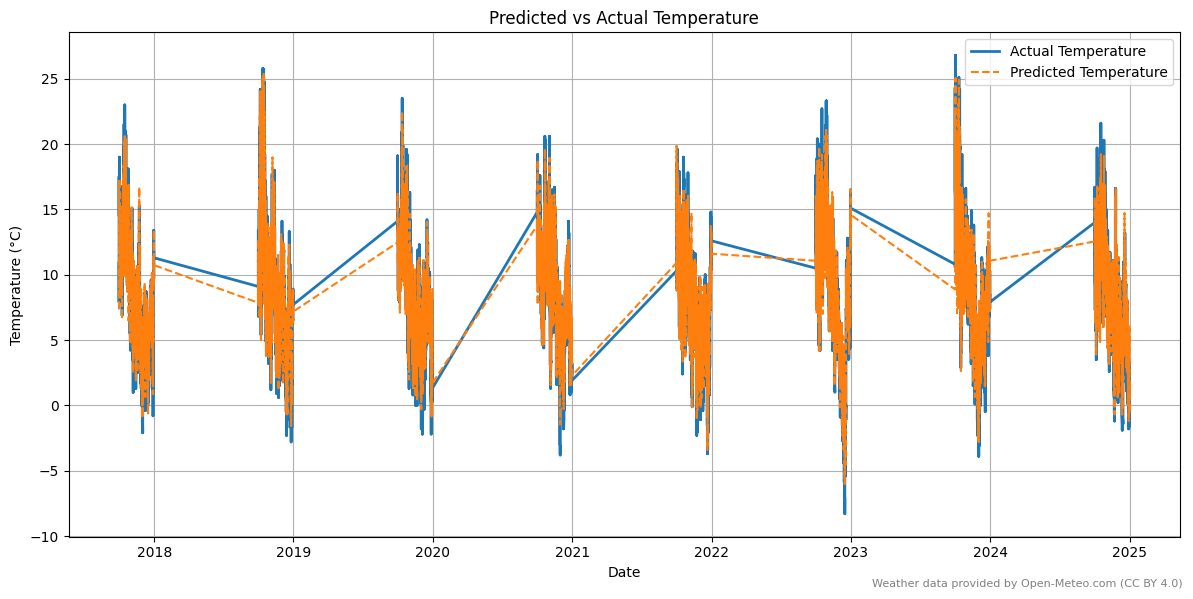

Current weather input:


,value
date,2025-11-05
temp,11.4
rel_humidity,70
pressure,1011.6
wind_speed,14.4
wind_direction,123
precip,0.0


Predicted temperature: 11.42 °C


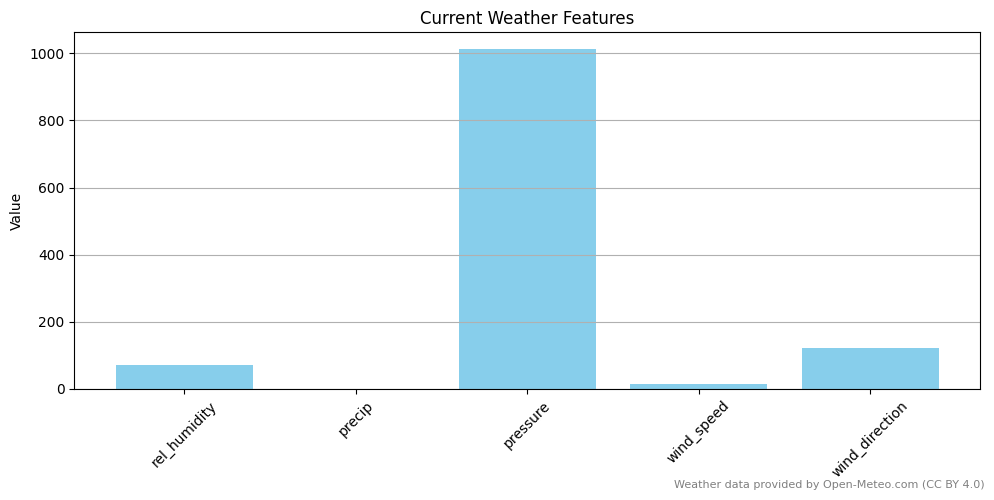

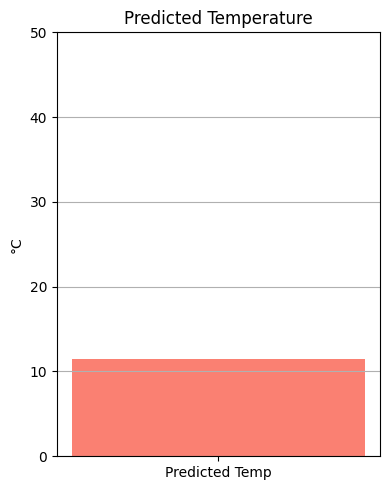

INFO:prefect.task_runs:Finished in state Completed()


Table elt-siegburg-weather-forecast.elt_weather_dataset_prediction_siegburg_october_2025.elt_weather_prediction_table_20251105_0938 exists but is empty. Loading data...


INFO:prefect.task_runs:Finished in state Completed()
INFO:prefect.flow_runs:Finished in state Completed()


Loaded 1 rows to elt-siegburg-weather-forecast.elt_weather_dataset_prediction_siegburg_october_2025.elt_weather_prediction_table_20251105_0938


In [13]:
# Import libraries
import sys
import importlib
import os

# Define the parent directory that contains both weather_pipeline and gcp_utils
parent_dir = "/content/drive/MyDrive/elt_pipeline_weather_forecast"

# Add the parent directory to sys.path to allow importing modules from its subdirectories
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)
    print(f"Added {parent_dir} to sys.path: {sys.path}")

import main
import gcp_utils.manage_gcp as manage_gcp

# Reload the modules to pick up any recent changes
importlib.reload(main)
importlib.reload(manage_gcp)
print(main.__file__)

# Call the Prefect flow pipeline
main.weather_pipeline_flow("/content/drive/MyDrive/elt_pipeline_weather_forecast/config.yaml")

# Future Dockerize the Project

For future dockerization base Dockerfile (comment out):

In [14]:
# dockerfile_code = """
# FROM python:3.10-slim

# WORKDIR /app

# COPY . .

# RUN pip install --no-cache-dir -r requirements.txt

# CMD ["python", "main.py"]
# """

# with open(f"{project_dir}/Dockerfile", "w") as f:
#     f.write(dockerfile_code)
